## Project 0: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive.

# Getting Started
To begin working with the RMS Titanic passenger data, we'll first need to `import` the functionality we need, and load our data into a `pandas` DataFrame.  
Run the code cell below to load our data and display the first few entries (passengers) for examination using the `.head()` function.

In [95]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head(1))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [96]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head(1))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function and test a prediction on the first five passengers.  


In [97]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    else:
        return "Number of predictions does not match number of outcomes!"
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.



# Making Predictions

If we were asked to make a prediction about any passenger aboard the RMS Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.  
The `predictions_0` function below will always predict that a passenger did not survive.

In [98]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """
    predictions = []
    for _, passenger in data.iterrows():
        # Predict the survival of 'passenger'
        predictions.append(0)
    # Return our predictions
    return pd.Series(predictions)
# Make the predictions
predictions = predictions_0(data)

### Question 1

* Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?

In [99]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


**Answer:** *The accuracy of the prediction model if all passengers
 are considered to have not survived is 61.62%*

***
Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using the `survival_stats` function. This function is defined in the `visuals.py` Python script included with this project. The first two parameters passed to the function are the RMS Titanic data and passenger survival outcomes, respectively. The third parameter indicates which feature we want to plot survival statistics across.  
Run the code cell below to plot the survival outcomes of passengers based on their sex.

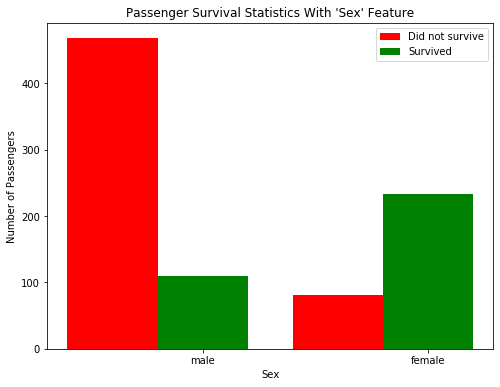

In [100]:
vs.survival_stats(data, outcomes, 'Sex')

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females *did* survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.  

In [101]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

### Question 2

* How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?

**Hint:** Run the code cell below to see the accuracy of this prediction.

In [102]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


**Answer**: *The accuracy of the prediction model if all 
female passengers are considered to have survived is 78.68%*

***
Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the `survival_stats` function. This time, we'll use a fourth parameter to filter out the data so that only passengers with the **Sex** 'male' will be included.  
Run the code cell below to plot the survival outcomes of male passengers based on their age.

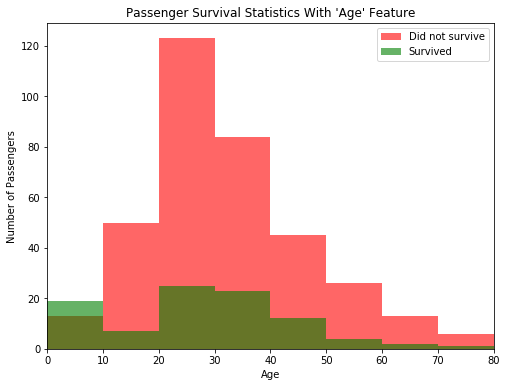

In [103]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examining the survival statistics, the majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older *did not survive* the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.  
Fill in the missing code below so that the function will make this prediction.  

In [104]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female' or passenger['Age'] <= 10:
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

### Question 3

* How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived? 

In [105]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.24%.


**Answer**: *The accuracy of the prediction model if all 
female passengers and all less than 10 year olds are considered to 
have survived is 78.68%.*

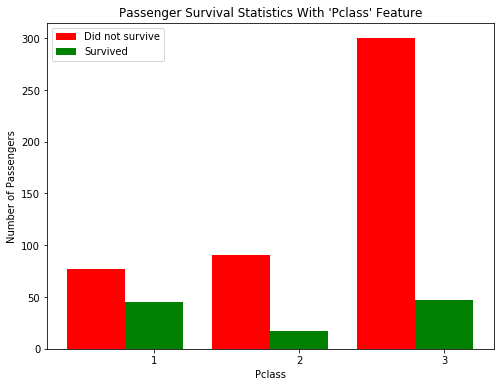

In [106]:
vs.survival_stats(data, 
                  outcomes, 
                  'Pclass', 
                  ["Sex == 'male'"])

The survival statistic of males across different 
socio-economic classes show that in almost all 
classes the rate of death is disproportionately higher. Hence we 
will abandon further investigation across socio-economic class and 
will move onto finding discrepancies (if any) across other factors.

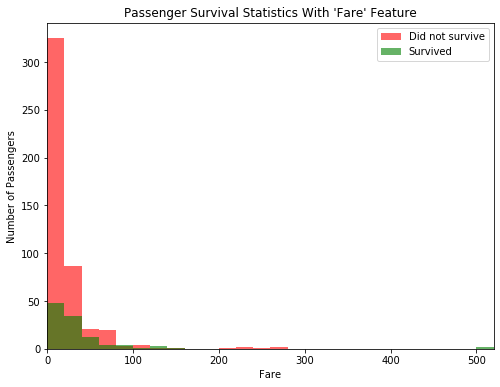

In [69]:
vs.survival_stats(data, 
                  outcomes, 
                  'Fare', 
                  ["Sex == 'male'"]) 

Assessing the survival rates of males across different levels of Fare, it can be observed that all who paid a fair > 500 were able to survive.

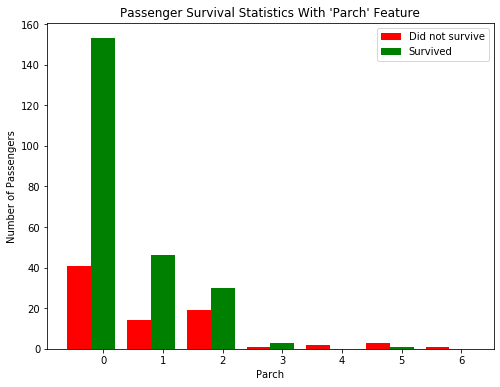

In [81]:
vs.survival_stats(data, 
                  outcomes, 
                  'Parch', 
                  ["Sex == 'female'"]) 

Assessing the survival rates of females across different levels of Parch, it can be observed that all with Parch >= 4 can be fairly assumed to have not survived.

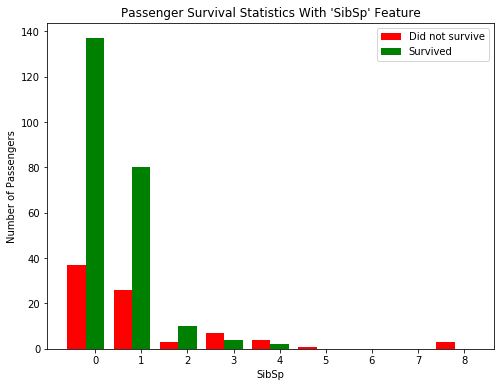

In [107]:
vs.survival_stats(data, 
                  outcomes, 
                  'SibSp', 
                  ["Sex == 'female'"]) 

Assessing the survival rates of females across different levels of SibSp, it can be observed that all with SibSp < 3 have disproportionately higher number of survivals. The findings found in the above visuals have been reflected in the final predictions model code as follows.

In [108]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            if passenger['Parch'] < 4 and passenger['SibSp'] < 3:
                predictions.append(1)
            else:
                predictions.append(0)
            # else if passenger is a male
        else:
            if passenger['Age'] <= 10 or passenger['Fare'] > 500 :
                predictions.append(1)
            else:
                predictions.append(0)
    # Return our predictions
    return pd.Series(predictions)
# Make the predictions
predictions = predictions_3(data)

In [111]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 81.03%.


**Answer**: *The accuracy of the prediction model reflected by the predictions_3() function is 81.03%.*

In order to further refine the accuracy obtained by the predictions_2() function, females who were initially considered to be unanimously surviving, were further analysed across different factor columns and it was found that not all females were survivors. Those with less than 4 Parents and Children and less than 3 Siblings and Spouse numbers could be fairly assumed to be surviving while the remaining ones did not survive.

Similarly, investigating into males further revealed that, in addition to those younger than the age of 10, those who had paid a fair > 500 survived the catastrophe. Considering these into account to revise the final prediction model led to an accuracy increase of upto 81.03%.

This prediction model implementation is obviously a manual and rather crude way of implementing the Decision Tree Classifier algorithm but serves as an excellent example of how the decision tree algorithm works under the hood.